[Reference](https://semaphoreci.medium.com/how-to-handle-imbalanced-data-for-machine-learning-in-python-b6d56c9a0489)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

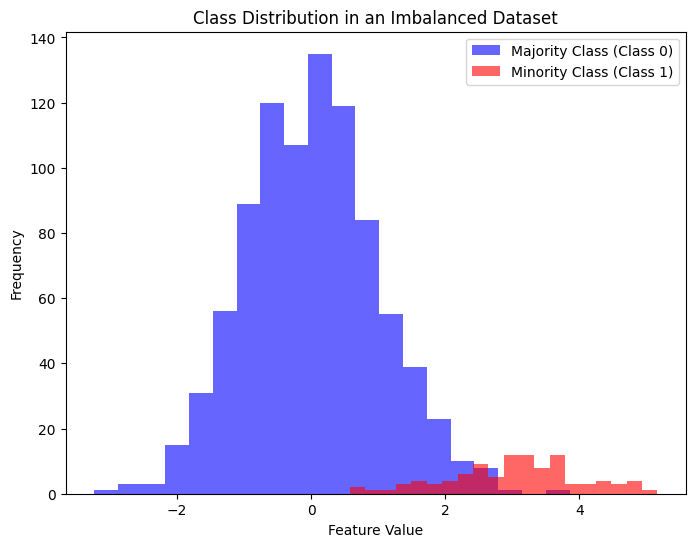

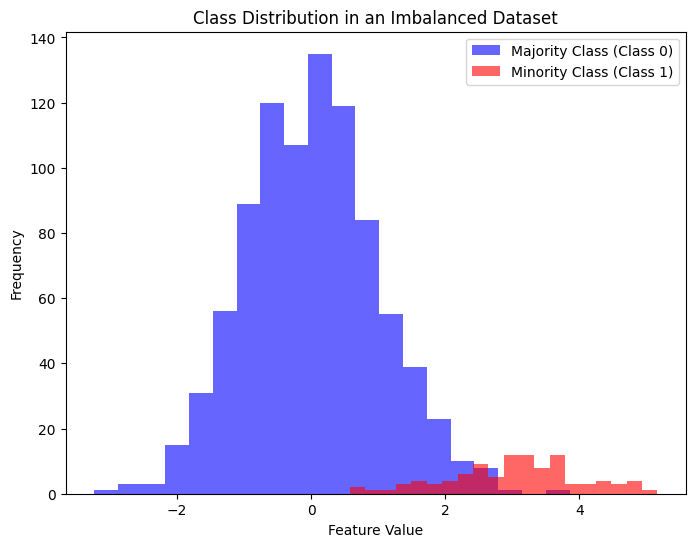

In [4]:
# Set random seed for reproducibility
np.random.seed(42)
# Generate data for a majority class (Class 0)
majority_class = np.random.normal(0, 1, 900)
# Generate data for a minority class (Class 1)
minority_class = np.random.normal(3, 1, 100)
# Combine the majority and minority class data
data = np.concatenate((majority_class, minority_class))
# Create labels for the classes
labels = np.concatenate((np.zeros(900), np.ones(100)))
# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.hist(data[labels == 0], bins=20, color='blue', alpha=0.6, label='Majority Class (Class 0)')
plt.hist(data[labels == 1], bins=20, color='red', alpha=0.6, label='Minority Class (Class 1)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Class Distribution in an Imbalanced Dataset')
plt.legend()
plt.show()# Set random seed for reproducibility
np.random.seed(42)
# Generate data for a majority class (Class 0)
majority_class = np.random.normal(0, 1, 900)
# Generate data for a minority class (Class 1)
minority_class = np.random.normal(3, 1, 100)
# Combine the majority and minority class data
data = np.concatenate((majority_class, minority_class))
# Create labels for the classes
labels = np.concatenate((np.zeros(900), np.ones(100)))
# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.hist(data[labels == 0], bins=20, color='blue', alpha=0.6, label='Majority Class (Class 0)')
plt.hist(data[labels == 1], bins=20, color='red', alpha=0.6, label='Minority Class (Class 1)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Class Distribution in an Imbalanced Dataset')
plt.legend()
plt.show()

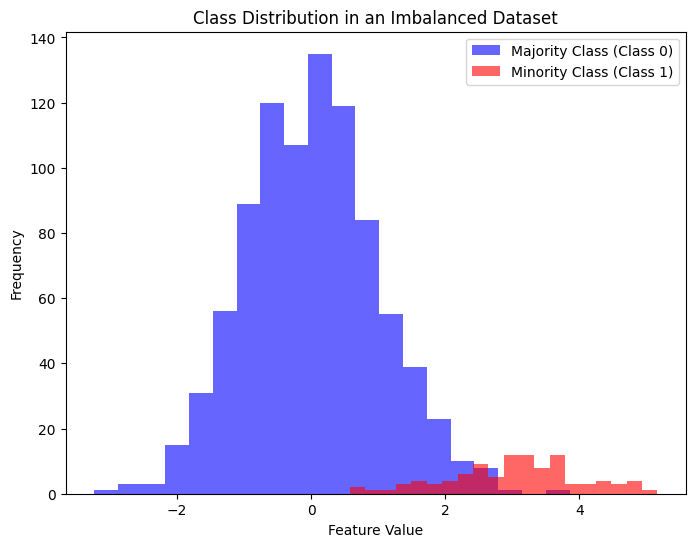

In [5]:
# Set random seed for reproducibility
np.random.seed(42)
# Generate data for a majority class (Class 0)
majority_class = np.random.normal(0, 1, 900)
# Generate data for a minority class (Class 1)
minority_class = np.random.normal(3, 1, 100)
# Combine the majority and minority class data
data = np.concatenate((majority_class, minority_class))
# Create labels for the classes
labels = np.concatenate((np.zeros(900), np.ones(100)))
# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.hist(data[labels == 0], bins=20, color='blue', alpha=0.6, label='Majority Class (Class 0)')
plt.hist(data[labels == 1], bins=20, color='red', alpha=0.6, label='Minority Class (Class 1)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Class Distribution in an Imbalanced Dataset')
plt.legend()
plt.show()

In [7]:
# True labels
true_labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
# Predicted labels by a model
predicted_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [9]:
# True labels
true_labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
# Predicted labels by a model
predicted_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
precision = precision_score(true_labels, predicted_labels)
print("Precision:", precision)

Precision: 0.5


In [11]:
# True labels
true_labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
# Predicted labels by a model
predicted_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
recall = recall_score(true_labels, predicted_labels)
print("Recall:", recall)

Recall: 1.0


In [14]:
# True labels
true_labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
# Predicted labels by a model
predicted_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# Calculate and print F1-score
f1 = f1_score(true_labels, predicted_labels)
print("F1-Score:", f1)

F1-Score: 0.6666666666666666


In [16]:
# True and predicted labels
true_labels = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
predicted_labels = [0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
# Create confusion mateix
cm = confusion_matrix(true_labels, predicted_labels)
# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5 0]
 [1 4]]


In [18]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

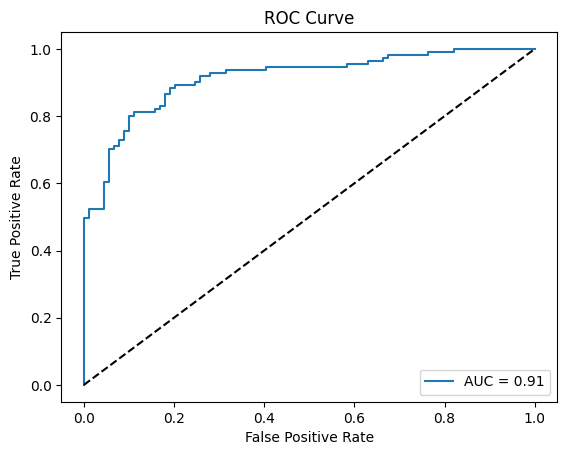

In [19]:
# Generate a random binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
       random_state=42)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                  test_size=0.2, random_state=42)
# Fit a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict probabilities for the testing data
probs = model.predict_proba(X_test)
# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
auc_score = roc_auc_score(y_test, probs[:, 1])
# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

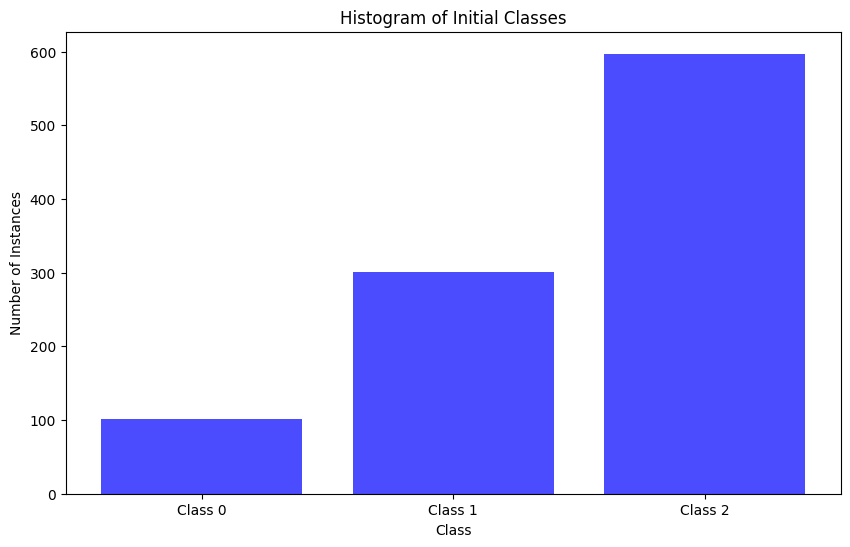

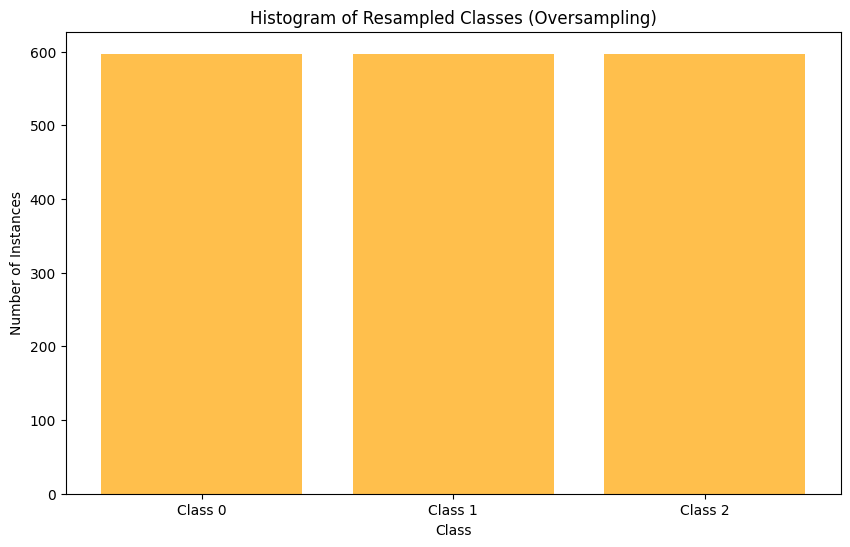

In [22]:
# Create an imbalanced dataset with 3 classes
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.3, 0.6],  # Class imbalance
    random_state=42
)
# Print the histogram of the initial classes
plt.figure(figsize=(10, 6))
plt.hist(y, bins=range(4), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title("Histogram of Initial Classes")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()
# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
# Print the histogram of the resampled classes
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='orange', alpha=0.7)
plt.title("Histogram of Resampled Classes (Oversampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

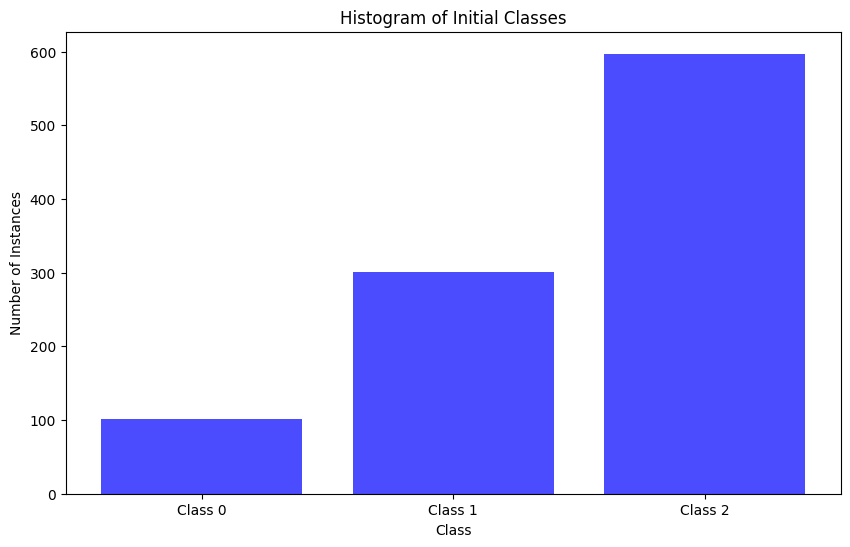

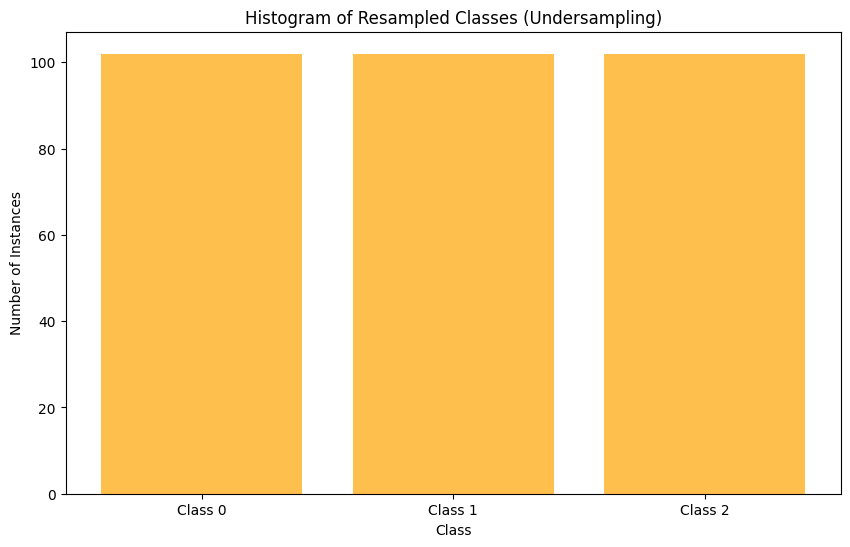

In [25]:
# Create an imbalanced dataset with 3 classes
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.3, 0.6],  # Class imbalance
    random_state=42
)
# Print the histogram of the initial classes
plt.figure(figsize=(10, 6))
plt.hist(y, bins=range(4), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title("Histogram of Initial Classes")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()
# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
# Print the histogram of the resampled classes
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='orange', alpha=0.7)
plt.title("Histogram of Resampled Classes (Undersampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

In [26]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

In [27]:
# Create an imbalanced dataset with 3 classes
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.3, 0.6],  # Class imbalance
    random_state=42
)
# Split the original dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
# Fit KNN classifier on the original train set
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
# Fit KNN classifier on the oversampled train set
knn_oversampled = KNeighborsClassifier(n_neighbors=5)
knn_oversampled.fit(X_train_oversampled, y_train_oversampled)
# Fit KNN classifier on the undersampled train set
knn_undersampled = KNeighborsClassifier(n_neighbors=5)
knn_undersampled.fit(X_train_undersampled, y_train_undersampled)
# Make predictions on train sets
y_train_pred_original = knn_original.predict(X_train)
y_train_pred_oversampled = knn_oversampled.predict(X_train_oversampled)
y_train_pred_undersampled = knn_undersampled.predict(X_train_undersampled)
# Make predictions on test sets
y_test_pred_original = knn_original.predict(X_test)
y_test_pred_oversampled = knn_oversampled.predict(X_test)
y_test_pred_undersampled = knn_undersampled.predict(X_test)
# Calculate and print accuracy for train sets
print("Accuracy on Original Train Set:", accuracy_score(y_train, y_train_pred_original))
print("Accuracy on Oversampled Train Set:", accuracy_score(y_train_oversampled, y_train_pred_oversampled))
print("Accuracy on Undersampled Train Set:", accuracy_score(y_train_undersampled, y_train_pred_undersampled))
# Calculate and print accuracy for test sets
print("\nAccuracy on Original Test Set:", accuracy_score(y_test, y_test_pred_original))
print("Accuracy on Oversampled Test Set:", accuracy_score(y_test, y_test_pred_oversampled))
print("Accuracy on Undersampled Test Set:", accuracy_score(y_test, y_test_pred_undersampled))

Accuracy on Original Train Set: 0.9125
Accuracy on Oversampled Train Set: 0.9514767932489452
Accuracy on Undersampled Train Set: 0.85

Accuracy on Original Test Set: 0.885
Accuracy on Oversampled Test Set: 0.79
Accuracy on Undersampled Test Set: 0.805


# Ensembling

In [28]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Create an imbalanced dataset with 3 classes
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.3, 0.6],  # Class imbalance
    random_state=42
)
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit Random Forest classifier on the train set
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
# Make predictions on train and test sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)
# Calculate and print accuracy for the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on Train Set:", train_accuracy)
# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy)

Accuracy on Train Set: 1.0
Accuracy on Test Set: 0.97
